In [21]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [22]:
stock = pd.read_csv("C:\AIdata\삼성전자.csv")

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\kgg07\AppData\Local\Temp\ipykernel_8756\2128007310.py:1: SyntaxWarning: invalid escape sequence '\A'
  stock = pd.read_csv("C:\AIdata\삼성전자.csv")


In [23]:
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-03,81300,83000,81100,82800,81256.14844,29546007
1,2021-06-04,82700,82700,81500,82200,80667.33594,18112259
2,2021-06-07,82700,82800,81600,81900,80372.93750,16496197
3,2021-06-08,82300,82600,81800,81900,80372.93750,12781226
4,2021-06-09,81500,82000,81100,81100,79587.84375,14908823
...,...,...,...,...,...,...,...
240,2022-05-26,66300,67200,65500,65900,65900.00000,15970890
241,2022-05-27,66700,66900,66200,66500,66500.00000,11405555
242,2022-05-30,67500,67800,66900,67700,67700.00000,14255484
243,2022-05-31,67500,67500,66700,67400,67400.00000,24365002


In [30]:
stock_AJ = stock[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [31]:
stock_AJ

,Date,Open,High,Low,Close,Volume
0,2021-06-03,81300,83000,81100,82800,29546007
1,2021-06-04,82700,82700,81500,82200,18112259
2,2021-06-07,82700,82800,81600,81900,16496197
3,2021-06-08,82300,82600,81800,81900,12781226
4,2021-06-09,81500,82000,81100,81100,14908823
...,...,...,...,...,...,...
240,2022-05-26,66300,67200,65500,65900,15970890
241,2022-05-27,66700,66900,66200,66500,11405555
242,2022-05-30,67500,67800,66900,67700,14255484
243,2022-05-31,67500,67500,66700,67400,24365002


In [32]:
stock_AJ['Date'].value_counts()

Date
2021-06-03    1
2022-01-17    1
2022-01-19    1
2022-01-20    1
2022-01-21    1
             ..
2021-10-08    1
2021-10-12    1
2021-10-13    1
2021-10-14    1
2022-06-02    1
Name: count, Length: 245, dtype: int64

In [33]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [34]:
dfx = stock_AJ[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
0,0.890110,0.983146,0.948571,0.482221
1,0.967033,0.966292,0.971429,0.295611
2,0.967033,0.971910,0.977143,0.269235
3,0.945055,0.960674,0.988571,0.208603
4,0.901099,0.926966,0.948571,0.243327
...,...,...,...,...
240,0.065934,0.095506,0.057143,0.260661
241,0.087912,0.078652,0.097143,0.186150
242,0.131868,0.129213,0.137143,0.232664
243,0.131868,0.112360,0.125714,0.397662


In [36]:
dfx.describe()
# Pandas 데이터프레임에서 사용하는 메서드로, 데이터프레임의 기본적인 통계 요약 정보를 제공합니다. 이 메서드는 숫자형 열에 대해 다음과 같은 통계 정보를 반환

,Open,High,Low,Volume
count,245.000000,245.000000,245.000000,245.000000
mean,0.498946,0.513231,0.519650,0.239820
std,0.265445,0.268757,0.272698,0.109234
min,0.000000,0.000000,0.000000,0.000000
25%,0.280220,0.286517,0.302857,0.187514
50%,0.505495,0.528090,0.531429,0.222054
75%,0.730769,0.752809,0.742857,0.274398
max,1.000000,1.000000,1.000000,1.000000


In [37]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [38]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.17582417582320975, 0.17977528089786643, 0.17714285714184488, 0.26907370630988764], [0.07692307692265427, 0.11797752808922483, 0.11428571428506122, 0.27866080987594616], [0.14835164835083323, 0.16292134831369146, 0.18285714285609794, 0.1976423031826185], [0.20329670329558627, 0.18539325842592475, 0.17714285714184488, 0.2233384102073154], [0.1318681318674073, 0.12359550561728316, 0.11428571428506122, 0.25269158673591813], [0.08791208791160487, 0.08988764044893321, 0.07999999999954285, 0.2472716011810089], [0.06593406593370366, 0.09550561797699154, 0.05714285714253061, 0.260661374159236], [0.08791208791160487, 0.07865168539281656, 0.09714285714230203, 0.1861504048521244], [0.1318681318674073, 0.12921348314534148, 0.13714285714207347, 0.23266418144167308], [0.1318681318674073, 0.11235955056116652, 0.12571428571356735, 0.3976619275890407]] -> [0.10497237569002778]


In [39]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 235 235


In [40]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (164, 10, 4) (164, 1)
테스트 데이터의 크기 : (71, 10, 4) (71, 1)


In [50]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN, Input
from keras.layers import SimpleRNNCell

In [52]:
model = Sequential()

model.add(Input(shape=(10, 4)))
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(RNN(SimpleRNNCell(units=20, activation='relu')))  # RNN 레이어에 셀 제공 / 구체적으로 하기 위해
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 10, 20)              │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rnn (RNN)                            │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,841 (11.10 KB)

 Trainable params: 2,841 (11.10 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 10, 20)              │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 10, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 20)                  │           3,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,301 (20.71 KB)

 Trainable params: 5,301 (20.71 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.3605
Epoch 2/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2769
Epoch 3/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1849
Epoch 4/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0811
Epoch 5/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0378 
Epoch 6/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0291
Epoch 7/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0265
Epoch 8/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0357
Epoch 9/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0311
Epoch 10/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0302
Epoch 11/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0219
Epoch 12/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0209
Epoch 13/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0216
Epoch 14/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0231 
Epoch 15/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0221
Epoch 16/70
6/6 ━━━━━━━━━━━━━━━━━━

In [55]:
model.evaluate(test_X, test_y)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0142  


0.0159921832382679

In [59]:
y_pred = model.predict(test_X) #test_y는 테스트 데이터의 실제 값이고, y_pred는 모델이 예측한 값

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [60]:
mse = tf.reduce_mean(tf.square(test_y - y_pred))
# 평균 제곱 오차(Mean Squared Error, MSE)를 계산
print(f'MSE: {mse.numpy()}')

MSE: 0.015992183133384956


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


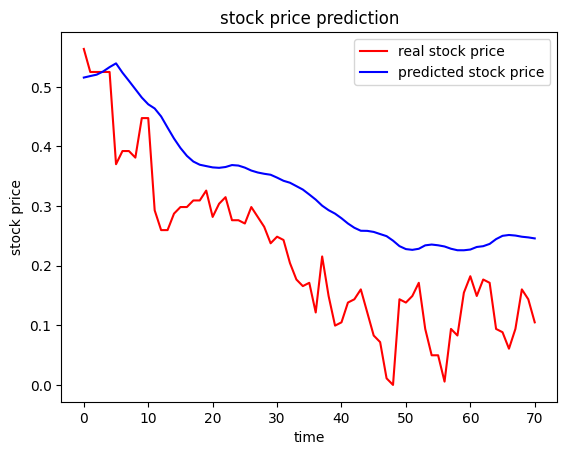

In [61]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()